# week 3

In [1]:
# Loading the packages needed for this week
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import interp1d
from scipy import optimize
import pandas as pd
import numpy as np
from __future__ import division
import time

import json
import re
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.linear_model as lm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline


### Excercise 3.1

> Write a script which reads a matrix from a file like [this one](http://pastebin.com/XAhwshXe) and solves the linear matrix equation Ax=b where b is the last column of the input-matrix and A is the other columns. It is okay to use the solve()-function from numpy.linalg. Does the result make sense?

In [2]:
#Opening the file
file = open ( 'linear matrix.txt' , 'r')

#Store each line of numbers within a list
file_list = [ map(int,line.split(',')) for line in file ]

#Create a matrix using the list
np_matrix = np.matrix(file_list)
print "The matrix from the file:"
print np_matrix

#Placing the last column in var b
b = np_matrix[:, len(np_matrix)]

#Placing the other colums in var a
a = np_matrix[:,:-1]

#use linalg.solve to solve the linear matrix equation
print 
print "The result of linalg.solve:"
print np.linalg.solve(a, b)

The matrix from the file:
[[ 1  2  3  4]
 [ 6  9 12  7]
 [ 2  0  9 10]]

The result of linalg.solve:
[[-5.09090909]
 [ 1.18181818]
 [ 2.24242424]]


Comparing the result with maple:

In [3]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/henrykaw/Tools-For-Big-Data/master/MapleRel.png', height=400, width=300) 

The results are the same, meaning the result gotten from numpy is valid and make sense.

### Exercise 3.2

> Write a script that reads in this list of points (x,y), fits/interpolates them with a polynomial of degree 3. Solve for the (real) roots of the polynomial numerically using Scipy’s optimization functions (not the root function in Numpy). Does the result make sense (plot something to check).

Approach:
1. read the list in as points into an array
2. interpolated list using scipy interpolate function interp1d with cubic option(this created the 3rd degree polynomial euation.
3. found the roots using scipy optimize.fsolve including x,y and a guess
4. plottet the interpolated function and the roots

It makes sense since the roots are located on the function itself. 


/Users/henrikkawa/anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:236: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Root 1 is:[ 0.3426043]
Root 2 is: [-1.41339476]


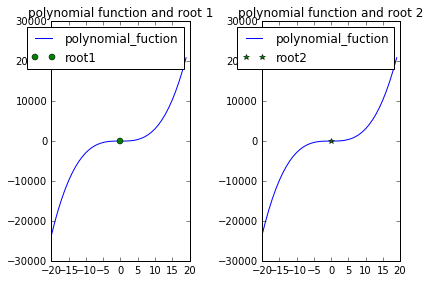

In [4]:
# Open a file to read a matrix and generate array
array = []
fin = open ("matrixfile.txt","r")
for line in fin.readlines():
        lines = line.split()
        array.append(lines)

# create an np array out of the array
degree = np.array(array, float)

# move the second column into y
y = degree[ :, 1]

# move first column into x
x = degree[: , 0]

polynomial_fuction = interp1d(x, y, kind='cubic')

root_1 = optimize.fsolve(polynomial_fuction, 0)
print'Root 1 is:' + str(root_1)

root_2 = optimize.fsolve(polynomial_fuction, -10)
print 'Root 2 is: '+  str(root_2)

plt.subplot(1,2,1)
plt.plot( x, y, root_1, 'o')
plt.title('polynomial function and root 1')
plt.legend(['polynomial_fuction', 'root1'])

plt.subplot(1,2,2)

plt.plot(x, polynomial_fuction(x), root_2,  '*')
plt.title('polynomial function and root 2')
plt.legend(['polynomial_fuction', 'root2'])
plt.tight_layout()

### Exercise 3.3

> Do the first two exercises (Todo’s) at the bottom of http://byumcl.bitbucket.org/bootcamp2013/labs/pandas.html

__First exercise__

> Todo Using the movie-lens 1M data and pandas.read_table read in all three files (users, ratings, movies) into pandas DataFrames. I recommend giving columns names directly to read_table for each case.

> HINT: you will need to open the files in a text editor to see what the separator character. Also, the columns for each file correspond to the following:


> * users.dat: user id, gender, age, occupation code, zip
> * ratings.dat: user id, movie id, rating, timestamp
> * movies.dat: movie id, title, genre

>Use the data combining tools discussed above to combine these three objects into a single object named movie_data

In [5]:
#Opening the three files and save them in the memory using pandas
# and state that the seperator for each value is ::
with open('movies.dat') as file1:
    df_movie = pd.read_table(file1, sep='::', header=None, names=['movie_id','title','genre'],lineterminator='\n', engine='python')
    
with open('users.dat') as file2:
    df_user = pd.read_table(file2, sep='::', header=None, names=['user_id', 'gender', 'age', 'occupation_code', 'zip'],lineterminator='\n', engine='python')
    
with open('ratings.dat') as file3:
    df_rating = pd.read_table(file3, sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'],lineterminator='\n',engine='python')  

#Using pandas to merge the dataframes together using columns they have in common
df_rating_movie =pd.merge(df_rating, df_movie, on='movie_id')
movie_data = pd.merge(df_rating_movie, df_user, on='user_id')
movie_data.head(3)

,user_id,movie_id,rating,timestamp,title,genre,gender,age,occupation_code,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067


__Second exercise__
> Todo Use the movie_data object from the previous exercise and compute the following things:

> 1.The 5 movies with the most number of ratings

In [6]:
#Remove unnecessary data columns
movie_data = movie_data.drop(['age', 'occupation_code', 'zip','timestamp','genre'],axis=1)

#First we use groupby on title and then rating, so
#we are able to count the number of ratings for each movie title 
movie_data_gb = movie_data.groupby(['title'])
movie_data_gb = movie_data_gb['rating']
movie_rating = movie_data_gb.agg('count')
movie_rating.sort_values(0,inplace=True, ascending = False)
movie_rating.head(5)

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: rating, dtype: int64

> 2.A new object called active_titles that is made up of movies each having at least 250 ratings

In [7]:
#Making a new object which have all title with count 
# of at least 250 ratings.
active_titles = movie_rating[movie_rating > 250]

#The list is sorted, so we just have to print the last 5 to lowest
#count of ratings in the object.
active_titles.tail(5)

title
Man Who Knew Too Little, The (1997)                               252
Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991)    251
Presidio, The (1988)                                              251
Wes Craven's New Nightmare (1994)                                 251
Top Hat (1935)                                                    251
Name: rating, dtype: int64

> 3.For the subset of movies in the active_titles list compute the following:

> * The 3 movies with the highest average rating for females. Do the same for males.

In [8]:
#Use the same method as above in order to calculate
#the mean and count the amount of ratings.
temp_gb = movie_data.groupby(['gender','title'])
temp_gb = temp_gb['rating']
temp_gb = temp_gb.agg(['count','mean']).reset_index()

#Remove movie titles with less than 250 ratings.
temp_gb = temp_gb[temp_gb['count']>250 ]

#Remove the 'count' columns because it is not needed anymore 
temp_gb = temp_gb.drop('count',axis=1)

#Make two dataframes one with male and one with female ratings
#and sort them based on the 'mean'.
female_ratings = temp_gb[temp_gb['gender']=='F']
female_ratings_sorted = female_ratings.sort_values('mean', ascending = False)
male_ratings = temp_gb[temp_gb['gender']=='M']
male_ratings_sorted = male_ratings.sort_values('mean', ascending = False)

In [9]:
#printing the top 3 movies
female_ratings_sorted.head(3)

,gender,title,mean
2736,F,Schindler's List (1993),4.562602
2800,F,"Shawshank Redemption, The (1994)",4.539075
3185,F,To Kill a Mockingbird (1962),4.536667


In [10]:
male_ratings_sorted.head(3)

,gender,title,mean
4821,M,"Godfather, The (1972)",4.583333
6394,M,Seven Samurai (The Magnificent Seven) (Shichin...,4.576628
6424,M,"Shawshank Redemption, The (1994)",4.560625


> * The 10 movies men liked much more than women and the 10 movies women liked more than men (use the difference in average ratings and sort ascending and descending).

In [11]:
#Removing the column 'gender'
female_ratings_sorted = female_ratings_sorted.drop(['gender'],axis=1)
male_ratings_sorted = male_ratings_sorted.drop('gender',axis=1)

#Renaming the columns
female_ratings_sorted.columns.values[1] = 'Female average'
male_ratings_sorted.columns.values[1] = 'Male average'
#Setting the data frames index to be the movie titles
female_ratings_sorted = female_ratings_sorted.set_index('title')
male_ratings_sorted = male_ratings_sorted.set_index('title')

#Merge the dataframes based on the index
male_vs_female = pd.concat([female_ratings_sorted, male_ratings_sorted], axis=1)

In [12]:
#Printing the current dataframes
male_vs_female.head(10)

,Female average,Male average
10 Things I Hate About You (1999),NaN,3.311966
101 Dalmatians (1961),NaN,3.500000
12 Angry Men (1957),NaN,4.328421
"13th Warrior, The (1999)",NaN,3.168000
"20,000 Leagues Under the Sea (1954)",NaN,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738
2010 (1984),NaN,3.413712
28 Days (2000),NaN,2.977707
"Absent Minded Professor, The (1961)",NaN,3.446809
Absolute Power (1997),NaN,3.327759


 On the dataframes above can it be seen that some columns will contain *NaN* and to plot the difference in average rating, it is needed to have two values. Therefore will all rows containing at least one *NaN* be removed.

In [13]:
#Removing all rows with 'NaN'
male_vs_female = male_vs_female.dropna(axis=0,how='any')

In [14]:
#Adding a new column to the dataframes which express the difference between female average
#and male average.
male_vs_female['Diff'] = male_vs_female['Female average'] - male_vs_female['Male average'] 

In [15]:
#Sorting the dataframe based on 'Diff'
male_vs_female_sorted = male_vs_female.sort_values(by='Diff',ascending=True)
#Printing the 10 movies the males likes much more than the females
male_vs_female_sorted.head(10)

,Female average,Male average,Diff
Animal House (1978),3.628906,4.167192,-0.538286
"South Park: Bigger, Longer and Uncut (1999)",3.422481,3.846686,-0.424206
Airplane! (1980),3.656566,4.064419,-0.407854
"Godfather: Part II, The (1974)",4.040936,4.437778,-0.396842
Aliens (1986),3.802083,4.186684,-0.384601
Terminator 2: Judgment Day (1991),3.785088,4.115367,-0.330279
Alien (1979),3.888252,4.216119,-0.327867
"Terminator, The (1984)",3.899729,4.205899,-0.306170
Groundhog Day (1993),3.735562,4.041358,-0.305796
2001: A Space Odyssey (1968),3.825581,4.129738,-0.304156


In [16]:
#printing the 10 movies the females likes much more than the males
male_vs_female_sorted.tail(10)

,Female average,Male average,Diff
Much Ado About Nothing (1993),4.224335,3.853960,0.370374
Strictly Ballroom (1992),4.174342,3.768817,0.405525
Pretty in Pink (1986),3.619772,3.211628,0.408144
Sense and Sensibility (1995),4.233333,3.819277,0.414056
Gone with the Wind (1939),4.269841,3.829371,0.440471
"Sound of Music, The (1965)",4.233677,3.783418,0.450259
Mary Poppins (1964),4.197740,3.730594,0.467147
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,0.512885
Grease (1978),3.975265,3.367041,0.608224
Dirty Dancing (1987),3.790378,2.959596,0.830782


> * The 5 movies that had the highest standard deviation in rating.

In [17]:
#Using groupby again
temp_gb = movie_data.groupby(['title'])
temp_gb = temp_gb['rating']
#Calculating the std
movie_std = temp_gb.agg(['count','std']).reset_index()
movie_std.sort_values('std',inplace=True, ascending = False)
#Removing movies with count under 250
movie_std = movie_std[movie_std['count']>250 ]
movie_std = movie_std.drop('count', axis=1)
movie_std = movie_std.set_index('title')

#Printing the 5 movies with highest std
movie_std.head(5)

,std
title,
Dumb & Dumber (1994),1.321333
"Blair Witch Project, The (1999)",1.316368
Natural Born Killers (1994),1.307198
Tank Girl (1995),1.277695
"Rocky Horror Picture Show, The (1975)",1.260177


### Exercise 3.4

> Last week you read in a dataset for [this Kaggle competition](https://www.kaggle.com/c/random-acts-of-pizza) and created a bag-of-words representation on the review strings. Train a logistic regression classifier for the competition using your bag-of-words features (and possibly some of the others) to predict the variable “requester_received_pizza”. For this exercise, you might want to work a little bit more on your code from last week. Use 90% of the data as training data and 10% as test data.

> If you don’t know anything about machine learning, try to Google a bit and figure out what training and test data is, and how you train a classifier.

>How good is your classifier? Discuss the performance of the classifier.

Approach:
1. use the method for cleaning and reusing the code for reading the file in etc from last weeks exercise- now just with updated features.
2. Use the bagofwords from scikit
3. dividing data into training and test
4. create the logistic regression classifier
5. training the logistic regression classifier
6. testing it with test data
7. evaluating result. 

The classifier is quite ok as shown below. 

In [18]:
#function that cleans text removes stopwords from list and and gives words in return. 

def cleaningText (text):
    # 1. Remove non-letters        
    letters = re.sub("[^a-zA-Z]", " ", text) 
    words = letters.lower().split()   
    # converting standard stop words from list to set since it is faster to search
    stop_words = set(stopwords.words("english"))                  
    # clean words from stop words
    cleanWords = [w for w in words if not w in stop_words]   
    return( " ".join( cleanWords ))                   
 

In [19]:
# Reading json file and assigning it to a value data
with open('pizza_request_dataset.json') as json_file:    
  data = json.load(json_file)

# Creating empty list to put the clean reviews in 
dataList = []
data_cleaned = []

In [20]:
# Looping over each record, then creating an index i from 0 to the length of the file
print "Cleaning and parsing text...\n"
for i in xrange(0, len(data) ):
    cleanedData = cleaningText(data[i]['request_text'])
    dataList.append(data[i]['requester_received_pizza'])
    data_cleaned.append(cleanedData )

Cleaning and parsing text...



In [21]:
# using scikits tool for bag-of-words  
vectorizer = CountVectorizer() 
# bag of words for all the data which we then convert to an array using numpy
bagOW = vectorizer.fit_transform(data_cleaned)
bagOW = bagOW.toarray()

In [22]:
# we need to divide the data so we have 90 procent for training and 10 procent for testing.
X_train, X_test, y_train, y_test = train_test_split(bagOW, list(dataList), test_size=0.10, random_state=42)

In [23]:
# first we are fitting the logistic regression classifier and then we are training our model with training data
logRegModel = lm.logistic.LogisticRegression()
logRegModel = logRegModel.fit(X_train,y_train)

In [24]:
# Now this is done, we can test our logistic regression classifier with the test data we created above.
#Our classifier performance rate in %
print  "Accuracy of the logistic regression classifier :" + str(logRegModel.score(X_test,y_test)*100)
# Although the array is printed without headings, you can see that the majority of the predictions fall on the diagonal
#line of the confusion  matrix which are all the correct predictions . 
predicted = logRegModel.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print "Confusion Matrix:" + str(matrix)

Accuracy of the logistic regression classifier :68.838028169
Confusion Matrix:[[356  63]
 [114  35]]


It states in the documentation for the sklearn.metrics.confusion_matrix that :
>By definition a confusion matrix C is such that C_{i, j}
is equal to the number of observations known to be in group i but predicted to be in group j.

In our case the y_test is the i and j is the predicted amount. 

### Exercise 3.5

> Write a simple Python function for computing the sum $\frac{1}{1^2} + \frac{1}{2^2} + \frac{1}{3^2} + \ldots$ with 10,000 terms (this should be around 1.644), 500 times in a row (to make the execution time measurable). Now compile the code with Cython and see how much speedup you can achieve by this. Remember to declare your variable types.

In [25]:
#Loading the Cython module
%load_ext Cython

In [26]:
def pythonCalculate():
    temp_num = 0
    start_time = time.time()
    cal_list = []
    for i in range (1,501):
        for i in range(1,10001):
            temp_num = temp_num + 1/(i**2)
        cal_list.append(temp_num)
        temp_num =0
    print cal_list[:10]
    return("--- %s seconds ---" % (time.time() - start_time))
print pythonCalculate()

[1.6448340718480652, 1.6448340718480652, 1.6448340718480652, 1.6448340718480652, 1.6448340718480652, 1.6448340718480652, 1.6448340718480652, 1.6448340718480652, 1.6448340718480652, 1.6448340718480652]
--- 0.690926074982 seconds ---


In [27]:
%%cython
from __future__ import division
import time
def cythonCalculate():
    cdef temp_num = 0
    cdef start_time = time.time()
    cdef cal_list = []
    for i in range (1,501):
        for i in range(1,10001):
            temp_num = temp_num + 1/(i**2)
        cal_list.append(temp_num)
        temp_num =0
    print cal_list[:10]
    return ("--- %s seconds ---" % (time.time() - start_time))
print cythonCalculate()

[1.6448340718480652, 1.6448340718480652, 1.6448340718480652, 1.6448340718480652, 1.6448340718480652, 1.6448340718480652, 1.6448340718480652, 1.6448340718480652, 1.6448340718480652, 1.6448340718480652]
--- 0.419452905655 seconds ---


At the beginning of the code are the variables initialize and the start time for the code is saved. The loop __for i in range(1,10001)__ have the same functionality as $\sum_{i=1}^{10000} \frac{1}{i^2}$ and __for i in range (1,501):__ runs the previous loop 500 times and add the results to a list. When the loops are completed then the function will print the last 10 results in order to reduce repeating numbers and then return the time spent on running the function by taking the current time minus the start time.

Based on the results then there is difference of 0.297 seconds or 54% in run time between Cython and Python.